In [1]:
import fitz
from PIL import Image
import io
import os

def extract_text_and_images_from_pdf(pdf_path, output_dir="extracted_images"):
    """
    Extracts text from a PDF file.

    Args:
        pdf_path (str): Path to the PDF file.
        output_dir (str, optional): Directory to save extracted images. Defaults to "extracted_images".

    Returns:
        tuple: A tuple containing the extracted text and a list of image paths.
    """
    text = ""
    images = []

    try:
        with fitz.open(pdf_path) as pdf:
            for page_number in range(len(pdf)):
                page = pdf.load_page(page_number)

                text += page.get_text()

                for img_index, img_info in enumerate(page.get_images(full=True)):
                    xref = img_info[0]
                    base_image = pdf.extract_image(xref)
                    image_bytes = base_image["image"]

                    # Create PIL image
                    image = Image.open(io.BytesIO(image_bytes))

                    # Create unique output name based on page number and image index
                    image_filename = f"image_{page_number}_{img_index}.{image.format}"
                    image_path = os.path.join(output_dir, image_filename)

                    # Create output directory if it doesn't exist
                    os.makedirs(output_dir, exist_ok=True)

                    image.save(image_path)
                    images.append(image_path)

    except (RuntimeError, TypeError, NameError, ValueError) as e:
        print(f"Error processing PDF: {e}")

    return text, images
pdf_path = "Sum_Rate_Maximization_for_Intelligent_Reflecting_Surface-Aided_Visible_Light_Communications.pdf"
text, image_paths = extract_text_and_images_from_pdf(pdf_path)
print("Extracted Text:")
print(text)


Extracted Text:
IEEE COMMUNICATIONS LETTERS, VOL. 25, NO. 11, NOVEMBER 2021
3619
Sum Rate Maximization for Intelligent Reﬂecting Surface-Aided
Visible Light Communications
Shiyuan Sun
, Fang Yang
, Senior Member, IEEE, and Jian Song
, Fellow, IEEE
Abstract—With the promotion of the solid-state lighting indus-
try, visible light communication (VLC) has attracted increasing
interests these years. However, the blockage problems in VLC due
to the nanoscale wavelength of the visible light are severe. In this
letter, a VLC system deployed with the intelligent reﬂecting
surface (IRS) is modeled under the point source assumption,
where both line-of-sight and specular non-line-of-sight paths
are considered. By introducing a discrete matrix, the resource
allocation process is simpliﬁed into a binary programming
problem, and then we propose a low-complexity algorithm to
maximize the achievable sum rate. Moreover, numerical results
demonstrate that IRS can improve the rate performance and ease
blo

In [2]:
import numpy as np

# Step 1: Define System Model
# Define positions of LEDs, PDs, and IRS units
# Define parameters such as Lambertian index, optical filter gain, etc.

# Step 2: Problem Formulation
# Define the optimization problem to maximize sum rate subject to QoS constraints

# Step 3: Algorithm Design (Proposed Relaxing Greedy Algorithm)
def relaxing_greedy_algorithm(N, L, K, R_min, h1, h2):
    # Initialization
    Q = set()
    A = set()
    B = set(range(1, K+1))  # All users initially belong to B
    n = 1
    
    # Solve P1 using PGD algorithm to obtain relaxed result G
    G = solve_P1(N, L, K, R_min, h1, h2)
    
    # Greedy assignment to satisfy QoS constraints
    while n <= N:
        # Find the LED with maximum gain for the n-th unit
        l_star = np.argmax(G[n])
        
        # Assign the n-th unit to LED l_star and update associations
        for l in range(1, L+1):
            if l == l_star:
                G[n][l] = 1
            else:
                G[n][l] = 0
        
        # Check QoS constraints and update sets A and B
        for k in range(1, K+1):
            if calculate_rate(k, G, h1, h2) > R_min[k]:
                A.add(k)
            else:
                B.add(k)
        
        # Update Q with tuples (n, a) where a is in A
        for a in A:
            Q.add((n, a))
        
        # Greedy policy for reassignment based on minimum rate gap
        while B:
            n_star, a_star = min(Q, key=lambda x: abs(R_min[x[1]] - calculate_rate(x[1], G, h1, h2)))
            b_star = argmin_rate_gap(B, R_min, G, h1, h2)
            
            # Reassign unit n_star to LED serving user b_star
            G[n_star][l_star] = 0  # Unassign the unit from its current LED
            G[n_star][b_star] = 1   # Assign the unit to LED serving user b_star
            
            # Update A and B based on QoS constraints
            if calculate_rate(b_star, G, h1, h2) > R_min[b_star]:
                A.add(b_star)
                B.remove(b_star)
            
            # Update Q with new assignments
            Q.remove((n_star, a_star))  # Remove the reassigned tuple
            for a in A:
                Q.add((n_star, a))
        
        n += 1
    
    return G

# Function to solve P1 using PGD algorithm
def solve_P1(N, L, K, R_min, h1, h2):
    # Implementation of PGD algorithm to solve P1
    # Return the relaxed result G
    pass

# Function to calculate rate for a user
def calculate_rate(k, G, h1, h2):
    # Implementation of rate calculation based on system parameters and associations
    pass

# Function to find LED serving user with minimum rate gap
def argmin_rate_gap(B, R_min, G, h1, h2):
    # Implementation to find LED serving user with minimum rate gap
    pass

# Step 4: Numerical Evaluation
# Evaluate the performance of the proposed algorithm through simulations


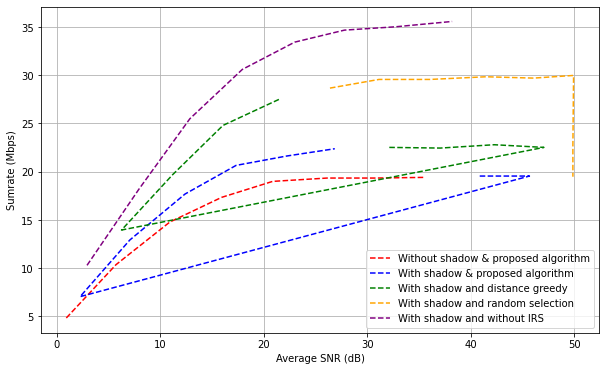

In [15]:
import matplotlib.pyplot as plt

# Points for plotting
points = [
    {"x": 0.9333317125110148, "y": 4.8359237201584335},
    {"x": 5.733331732856064, "y": 10.3626910506845},
    {"x": 10.933333238389768, "y": 14.78411334828707},
    {"x": 15.93333272976352, "y": 17.340242349218247},
    {"x": 20.866666578504784, "y": 18.99827439313456},
    {"x": 26.133328640408468, "y": 19.34369751600303},
    {"x": 30.933331203884773, "y": 19.34369751600303},
    {"x": 35.53333175320112, "y": 19.412781086429003},
    {"x": 40.86666454399979, "y": 19.550950862650243},
    {"x": 45.66666202121358, "y": 19.550950862650243},
    {"x": 2.266664910210682, "y": 7.046634868959718},
    {"x": 7.066664930555733, "y": 12.918827957723531},
    {"x": 12.399997721354397, "y": 17.685665472086704},
    {"x": 17.33333157009567, "y": 20.656306437050887},
    {"x": 22.199999776204454, "y": 21.623489599861006},
    {"x": 26.866665968153285, "y": 22.383422051393186},
    {"x": 32.133328030056965, "y": 22.521589192245145},
    {"x": 37.06666187879824, "y": 22.452505621819167},
    {"x": 42.26666338433194, "y": 22.797928744687628},
    {"x": 47.066660861545735, "y": 22.521589192245145},
    {"x": 6.266667046440934, "y": 13.95509732632891},
    {"x": 11.200000895182201, "y": 19.689120638871486},
    {"x": 16.06666401502848, "y": 24.801383911472406},
    {"x": 21.466662448459633, "y": 27.495682688624818},
    {"x": 26.399996297200904, "y": 28.67012183345144},
    {"x": 31.13332813178221, "y": 29.56822274352022},
    {"x": 36.066661980523484, "y": 29.56822274352022},
    {"x": 41.466660413954635, "y": 29.844560978278064},
    {"x": 46.06666096327099, "y": 29.706391202056825},
    {"x": 49.93332927110502, "y": 29.98272943681466},
    {"x": 49.86665854221003, "y": 22.728845174261647},
    {"x": 49.86665854221003, "y": 19.48186729222427},
    {"x": 2.9333315090605168, "y": 10.293612750997097},
    {"x": 7.933333543565518, "y": 18.169258371176408},
    {"x": 12.866667392306782, "y": 25.492230157209324},
    {"x": 17.933332526313016, "y": 30.604492112125605},
    {"x": 22.999997660319245, "y": 33.43696066549926},
    {"x": 27.799995137533053, "y": 34.680484698436494},
    {"x": 32.733328986274316, "y": 35.02590782130496},
    {"x": 38.19999814860045, "y": 35.578584290820636},
    {"x": 43.33332892523918, "y": 35.50949940271002},
    {"x": 47.866658745660544, "y": 35.78583763746786},
    {"x": 49.86665854221003, "y": 35.78583763746786},
]

# Separate the points into 5 groups for each line
lines_points = [points[i:i + 8] for i in range(0, len(points), 8)]

# Merge the points into 5 lines
lines_merged = []
for line_points in lines_points:
    x_values = [point['x'] for point in line_points]
    y_values = [point['y'] for point in line_points]
    lines_merged.append((x_values, y_values))

# Plotting
plt.figure(figsize=(10, 6))

# Specify 5 different colors for the lines
colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = ['Without shadow & proposed algorithm', 'With shadow & proposed algorithm', 'With shadow and distance greedy', 'With shadow and random selection', 'With shadow and without IRS']

# Plot each line with a specified color
for i in range(5):
    x_values, y_values = lines_merged[i]
    plt.plot(x_values, y_values, linestyle='--', color=colors[i], label=labels[i])

plt.xlabel('Average SNR (dB)')
plt.ylabel('Sumrate (Mbps)')
plt.legend()
plt.grid(True)
plt.show()


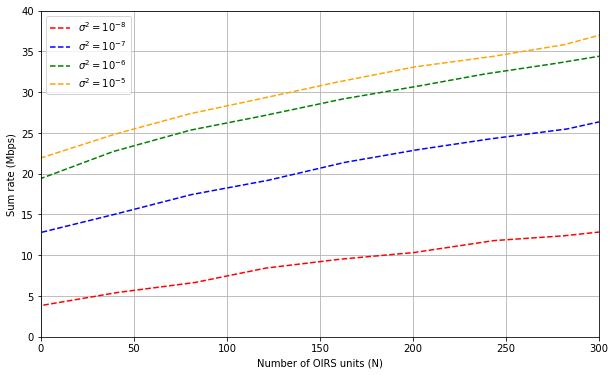

In [18]:
import matplotlib.pyplot as plt

# Points for plotting
points = [
    {"x": 1.2766086618080508, "y": 3.882780637713999},
    {"x": 40.85107135902179, "y": 5.421246690610301},
    {"x": 82.97873514709819, "y": 6.666665735116634},
    {"x": 120.85108001649027, "y": 8.424908660355136},
    {"x": 161.27660974399154, "y": 9.523809789966677},
    {"x": 200.4255308096848, "y": 10.329669500488437},
    {"x": 243.40424539529536, "y": 11.794871006637162},
    {"x": 280.85106486592036, "y": 12.380951050166628},
    {"x": 302.12765945934217, "y": 12.893772136248696},
    {"x": 0.4255416315205049, "y": 12.8205131788013},
    {"x": 40.85107135902179, "y": 15.091574395471776},
    {"x": 80.85107568775604, "y": 17.435891774939563},
    {"x": 122.12765621279145, "y": 19.19414028947824},
    {"x": 163.4042692033337, "y": 21.39194254870132},
    {"x": 202.12766487025993, "y": 22.930403012297443},
    {"x": 240.8510605371861, "y": 24.249083808901272},
    {"x": 282.97872432526253, "y": 25.4945056480577},
    {"x": 300.42555786427386, "y": 26.37362711067695},
    {"x": -0.8510507975341275, "y": 19.34065820437304},
    {"x": 38.723411899679625, "y": 22.71062334530515},
    {"x": 80.42555028898899, "y": 25.347984938512806},
    {"x": 119.57447135468222, "y": 27.106227863751307},
    {"x": 162.12766054152567, "y": 29.157509413429494},
    {"x": 203.4042410665611, "y": 30.76923162912311},
    {"x": 238.72340107784393, "y": 32.23443313527183},
    {"x": 277.44679674477015, "y": 33.55311393187565},
    {"x": 300.85105079753407, "y": 34.4322353944949},
    {"x": -0.42552539876708645, "y": 21.9047608401333},
    {"x": 39.57446269721374, "y": 24.83516385243074},
    {"x": 79.57446702594798, "y": 27.326007530743595},
    {"x": 121.70213081402439, "y": 29.377289080421786},
    {"x": 158.72339242037543, "y": 31.20879096310769},
    {"x": 201.27658160721896, "y": 33.11355320056603},
    {"x": 242.12766919899423, "y": 34.35897224507237},
    {"x": 281.27659026468746, "y": 35.824173751221096},
    {"x": 300.42555786427386, "y": 36.99633803025516},
]

# Separate the points into 4 groups for each line
lines_points = [points[i:i + 9] for i in range(0, len(points), 9)]

# Separate the points into x and y lists for plotting
x_values = [[point['x'] for point in line] for line in lines_points]
y_values = [[point['y'] for point in line] for line in lines_points]

# Plotting
plt.figure(figsize=(10, 6))

# Specify 4 different colors for the lines
colors = ['red', 'blue', 'green', 'orange']
labels = [r'$\sigma^2 = 10^{-8}$', r'$\sigma^2 = 10^{-7}$', r'$\sigma^2 = 10^{-6}$', r'$\sigma^2 = 10^{-5}$']

# Plot each line with a specified color and label
for i in range(4):
    plt.plot(x_values[i], y_values[i], linestyle='--', color=colors[i], label=labels[i])

plt.xlabel('Number of OIRS units (N)')
plt.ylabel('Sum rate (Mbps)')
plt.legend()
plt.xlim(0, 300)
plt.ylim(0, 40)
plt.grid(True)
plt.show()
